# Crimes in Chicago 

Dati presi da Kaggle https://www.kaggle.com/currie32/crimes-in-chicago .
L'obiettivo del notebbok è quello di eseguire delle analisi esplorative sui crimini commessi a Chicago in un orizzonte temporale di 10 anni, dal 2007 al 2017 e di predire il numero di crimini nel 2018.

Iniziamo importando le librerie python che verrano utilizzate all'interno del documento 

In [1]:
#analisi EDA   
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime
#import wordcloud

#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#accesso alle funzionalità del sistema operativo 
import os 

print ("Setup Complete.")

Setup Complete.


In [2]:
#codice per il reload automatico e inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Dichiariamo ora le costanti.

In [3]:
BASEPATH = os.path.abspath('')

DATASET1 = 'Chicago_Crimes_2005_to_2007.csv'
DATASET2 = 'Chicago_Crimes_2008_to_2011.csv'
DATASET3 = 'Chicago_Crimes_2012_to_2017.csv'

PATH1 = os.path.join(BASEPATH,DATASET1)
PATH2 = os.path.join(BASEPATH,DATASET2)
PATH3 = os.path.join(BASEPATH,DATASET3)

print("Path 1:",PATH1)
print("Path 2:",PATH2)
print("Path 3:",PATH3)

Path 1: C:\Users\nigroch1\Documents\DATA SCIENCE COURSE\Esame_Corso_DataScience\Chicago_Crimes_2005_to_2007.csv
Path 2: C:\Users\nigroch1\Documents\DATA SCIENCE COURSE\Esame_Corso_DataScience\Chicago_Crimes_2008_to_2011.csv
Path 3: C:\Users\nigroch1\Documents\DATA SCIENCE COURSE\Esame_Corso_DataScience\Chicago_Crimes_2012_to_2017.csv


### Importazione dei dati

Importo i tre csv separatamente e li concateno in modo tale da creare un'unico dataframe contenente i dati dal 2007 al 2017. Prima di concatenarli però effettuo pulizia dei dati sui singoli dataframe (questo per permettere migliore sostituzione di eventuali valori NaN)

#### Crimini relativi all'anno 2007

In [4]:
#importo il csv sulle analisi dei crimini dal 2005 al 2007
Chicago_05_07 = pd.read_csv(PATH1, header=0, error_bad_lines = False)
Chicago_05_07 = Chicago_05_07.iloc[:,1:]
Chicago_05_07.head()

b'Skipping line 533719: expected 23 fields, saw 24\n'


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
print("Il dataframe 'Chicago_05_07' contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne")

Il dataframe 'Chicago_05_07' contiene:
 1,872,343 righe
 22 colonne


In [6]:
#che tipo di dari ho? 
Chicago_05_07.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Come prima cosa, per lavorare agevolmente con il dataframe, rinomino le colonne in modo tale da eliminare lo spazio nel nome e trasformo nel formato corretto i campi contenenti una data.

In [7]:
#funzione replace
Chicago_05_07.columns=[c.replace( ' ', '_') for c in Chicago_05_07.columns]
Chicago_05_07.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
#trasformo i campi 'Date' e 'Update_On' da object a datetime64
Chicago_05_07.Date = pd.to_datetime(Chicago_05_07.Date, format='%m/%d/%Y %I:%M:%S %p')
Chicago_05_07.Updated_On = pd.to_datetime(Chicago_05_07.Updated_On, format='%m/%d/%Y %I:%M:%S %p')
Chicago_05_07.dtypes

ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                    object
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

##### Trattamento valori duplicati

Controllo che il dataframe non contenga righe duplicate e procedo all'analisi dei valori NaN.

In [9]:
#controllo se ci sono valori duplicati
Chicago_05_07.duplicated().sum()

533716

In [10]:
Chicago_05_07.loc[Chicago_05_07.duplicated()==True]

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
533717,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,...,20.0,42.0,18,1181027.0,1861693.0,2006,2016-04-15 08:55:02,41.775733,-87.611920,"(41.775732538, -87.611919814)"
533718,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,2016-04-15 08:55:02,41.769897,-87.593671,"(41.769897392, -87.593670899)"
533719,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,2016-04-15 08:55:02,41.942984,-87.780057,"(41.942984005, -87.780056951)"
533720,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,13.0,65.0,18,1152412.0,1864560.0,2006,2016-04-15 08:55:02,41.784211,-87.716745,"(41.784210853, -87.71674491)"
533721,4673631,HM263167,2006-03-30 22:30:00,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,False,...,17.0,67.0,08A,1167688.0,1855998.0,2006,2016-04-15 08:55:02,41.760401,-87.660982,"(41.760401372, -87.660982392)"
533722,4673632,HM273234,2006-04-05 12:10:00,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,...,45.0,11.0,08B,1140791.0,1932993.0,2006,2016-04-15 08:55:02,41.972221,-87.757670,"(41.972220564, -87.75766982)"
533723,4673633,HM275105,2006-04-05 15:00:00,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,2016-04-15 08:55:02,41.770926,-87.688304,"(41.770925978, -87.688304107)"
533724,4673634,HM275063,2006-04-05 21:30:00,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,2016-04-15 08:55:02,41.895923,-87.676334,"(41.895922672, -87.676333733)"
533725,4673635,HM268513,2006-04-03 03:00:00,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,20.0,42.0,08B,1180669.0,1863047.0,2006,2016-04-15 08:55:02,41.779456,-87.613191,"(41.77945628, -87.613190628)"
533726,4673637,HM275073,2006-04-06 11:15:00,0000X N LA SALLE ST,0810,THEFT,OVER $500,STREET,False,False,...,42.0,32.0,06,1175135.0,1900412.0,2006,2016-04-15 08:55:02,41.882114,-87.632361,"(41.882114362, -87.632361012)"


In [11]:
#elimino righe duplicate 
x=Chicago_05_07.duplicated().sum()
Chicago_05_07 = Chicago_05_07.drop_duplicates()
print("Sono stati eliminati",x,"record.")
print("Il dataframe 'Chicago_05_07' ora contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne")

Sono stati eliminati 533716 record.
Il dataframe 'Chicago_05_07' ora contiene:
 1,338,627 righe
 22 colonne


##### Trattamento valori nulli 

In [12]:
#controllo numero dei valori null
Chicago_05_07.isnull().sum()

ID                         0
Case_Number                0
Date                       0
Block                      0
IUCR                       0
Primary_Type               0
Description                0
Location_Description      20
Arrest                     0
Domestic                   0
Beat                       0
District                   4
Ward                       9
Community_Area           261
FBI_Code                   0
X_Coordinate            7471
Y_Coordinate            7471
Year                       0
Updated_On                 0
Latitude                7471
Longitude               7471
Location                7471
dtype: int64

Di questo dataframe, mi servono solo i valori relativi all'anno 2007, quindi, visto che il campo Year non contiene valori nulli, eseguo la selezione del dataframe, in modo tale da valutare quanto pessano rispetto al dataframe corretto. 

In [13]:
#filtro il dataframe per year = 2007 
Chicago_05_07 = Chicago_05_07.loc[Chicago_05_07.Year >= 2006]
print("Il dataframe 'Chicago_05_07' ora contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne.")

Il dataframe 'Chicago_05_07' ora contiene:
 884,961 righe
 22 colonne.


In [14]:
Chicago_05_07['Mese']=Chicago_05_07.Date.dt.strftime('%m')
Chicago_05_07.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Mese
0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,11.0,26,1136872.0,1936499.0,2006,2016-04-15 08:55:02,41.981913,-87.771996,"(41.981912692, -87.771996382)",04
1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,...,42.0,18,1181027.0,1861693.0,2006,2016-04-15 08:55:02,41.775733,-87.611920,"(41.775732538, -87.611919814)",02
2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,...,69.0,04A,1186023.0,1859609.0,2006,2016-04-15 08:55:02,41.769897,-87.593671,"(41.769897392, -87.593670899)",01
3,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,17.0,08B,1134772.0,1922299.0,2006,2016-04-15 08:55:02,41.942984,-87.780057,"(41.942984005, -87.780056951)",04
4,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,65.0,18,1152412.0,1864560.0,2006,2016-04-15 08:55:02,41.784211,-87.716745,"(41.784210853, -87.71674491)",02


In [15]:
#controllo numero dei valori null
Chicago_05_07.isnull().sum()

ID                         0
Case_Number                0
Date                       0
Block                      0
IUCR                       0
Primary_Type               0
Description                0
Location_Description      14
Arrest                     0
Domestic                   0
Beat                       0
District                   3
Ward                       8
Community_Area           207
FBI_Code                   0
X_Coordinate            3727
Y_Coordinate            3727
Year                       0
Updated_On                 0
Latitude                3727
Longitude               3727
Location                3727
Mese                       0
dtype: int64

In [16]:
#print la percentuale di record con valori nan rispetto al totale
print("Lo", round(Chicago_05_07.Location_Description.isnull().sum()/Chicago_05_07.shape[0]*100,4),"% dei record del campo 'Location_Description' contiene valori nulli.")
print("Lo", round(Chicago_05_07.District.isnull().sum()/Chicago_05_07.shape[0]*100,4),"% dei record del campo 'District' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Ward.isnull().sum()/Chicago_05_07.shape[0]*100,4),"% dei record del campo 'Ward' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Community_Area.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Community_Area' contiene valori nulli.")
print("Lo", round(Chicago_05_07.X_Coordinate.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'X_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Y_Coordinate.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Y_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Latitude.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Latitude' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Longitude.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Longitude' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Location.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Location' contiene valori nulli.")

Lo 0.0016 % dei record del campo 'Location_Description' contiene valori nulli.
Lo 0.0003 % dei record del campo 'District' contiene valori nulli.
Lo 0.0009 % dei record del campo 'Ward' contiene valori nulli.
Lo 0.02 % dei record del campo 'Community_Area' contiene valori nulli.
Lo 0.42 % dei record del campo 'X_Coordinate' contiene valori nulli.
Lo 0.42 % dei record del campo 'Y_Coordinate' contiene valori nulli.
Lo 0.42 % dei record del campo 'Latitude' contiene valori nulli.
Lo 0.42 % dei record del campo 'Longitude' contiene valori nulli.
Lo 0.42 % dei record del campo 'Location' contiene valori nulli.


I record NaN sono tutti inferiori allo 0,5% del totale del dataframe. Decido quindi semplicemente di eliminare questi valori.

In [17]:
#elimino i valori NaN
Chicago_05_07= Chicago_05_07.dropna()
print("Il dataframe 'Chicago_05_07' ora contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne.")

Il dataframe 'Chicago_05_07' ora contiene:
 881,022 righe
 23 colonne.


Ora che ho pulito il mio dataframe, ordino per data descrescente e resetto l'indice

In [18]:
Chicago_05_07 = Chicago_05_07.sort_values(by=['Date']).reset_index(drop=True)
Chicago_05_07.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Mese
0,4515022,HM103718,2006-01-01,014XX N LEAVITT ST,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,...,24.0,06,1161471.0,1909655.0,2006,2016-04-15 08:55:02,41.907773,-87.682277,"(41.907773204, -87.682277478)",01
1,5190452,HM781618,2006-01-01,008XX N MAPLEWOOD AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,24.0,06,1159247.0,1905528.0,2006,2016-04-15 08:55:02,41.896494,-87.690561,"(41.896494407, -87.690560868)",01
2,5192880,HM783360,2006-01-01,070XX S BENNETT AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,43.0,06,1190099.0,1858398.0,2006,2016-04-15 08:55:02,41.766477,-87.578769,"(41.766477148, -87.578769217)",01
3,4788170,HM401329,2006-01-01,043XX W WILCOX ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,26.0,06,1147384.0,1898981.0,2006,2016-04-15 08:55:02,41.878764,-87.734300,"(41.878764326, -87.734299722)",01
4,4557528,HM144526,2006-01-01,092XX S CLYDE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,...,48.0,08B,1191789.0,1844058.0,2006,2016-04-15 08:55:02,41.727086,-87.573039,"(41.727086083, -87.573039267)",01


#### Crimini relativi agli anni 2008- 2011

Importo ora il secondo csv relativo ai dati dal 2008 al 2011

In [19]:
#importo il csv sulle analisi dei crimini dal 2008 al 2011
Chicago_08_11 = pd.read_csv(PATH2, header=0, error_bad_lines = False)
Chicago_08_11 = Chicago_08_11.iloc[:,1:]
Chicago_08_11.head()

b'Skipping line 1149094: expected 23 fields, saw 41\n'


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [20]:
print("Il dataframe 'Chicago_08_11' contiene:\n",format(Chicago_08_11.shape[0],',d'),"righe\n",Chicago_08_11.shape[1],"colonne")

Il dataframe 'Chicago_08_11' contiene:
 2,688,710 righe
 22 colonne


In [21]:
#che tipo di dati ho? 
Chicago_08_11.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [22]:
#funzione replace
Chicago_08_11.columns=[c.replace( ' ', '_') for c in Chicago_08_11.columns]
Chicago_08_11.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [23]:
#trasformo i campi 'Date' e 'Update_On' da object a datetime64
Chicago_08_11.Date = pd.to_datetime(Chicago_08_11.Date, format='%m/%d/%Y %I:%M:%S %p')
Chicago_08_11.Updated_On = pd.to_datetime(Chicago_08_11.Updated_On, format='%m/%d/%Y %I:%M:%S %p')
Chicago_08_11.dtypes

ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                    object
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

##### Trattamento valori duplicati

Controllo che il dataframe non contenga righe duplicate e procedo all'analisi dei valori NaN.

In [24]:
#controllo se ci sono valori duplicati
Chicago_08_11.duplicated().sum()

1147495

In [25]:
#elimino righe duplicate 
x=Chicago_08_11.duplicated().sum()
Chicago_08_11 = Chicago_08_11.drop_duplicates()
print("Sono stati eliminati",x,"record.")
print("Il dataframe 'Chicago_08_11' ora contiene:\n",format(Chicago_08_11.shape[0],',d'),"righe\n",Chicago_08_11.shape[1],"colonne")

Sono stati eliminati 1147495 record.
Il dataframe 'Chicago_08_11' ora contiene:
 1,541,215 righe
 22 colonne


##### Trattamento valori nulli 

In [26]:
#controllo numero dei valori null
Chicago_08_11.isnull().sum()

ID                          0
Case_Number                 3
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description      274
Arrest                      0
Domestic                    0
Beat                        0
District                   42
Ward                       39
Community_Area            829
FBI_Code                    0
X_Coordinate            15653
Y_Coordinate            15653
Year                        0
Updated_On                  0
Latitude                15653
Longitude               15653
Location                15653
dtype: int64

In [27]:
#print la percentuale di record con valori nan rispetto al totale
print("Lo", round(Chicago_08_11.Case_Number.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'Case_Number' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Location_Description.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'Location_Description' contiene valori nulli.")
print("Lo", round(Chicago_08_11.District.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'District' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Ward.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'Ward' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Community_Area.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Community_Area' contiene valori nulli.")
print("Lo", round(Chicago_08_11.X_Coordinate.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'X_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Y_Coordinate.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Y_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Latitude.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Latitude' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Longitude.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Longitude' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Location.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Location' contiene valori nulli.")

Lo 0.0002 % dei record del campo 'Case_Number' contiene valori nulli.
Lo 0.0178 % dei record del campo 'Location_Description' contiene valori nulli.
Lo 0.0027 % dei record del campo 'District' contiene valori nulli.
Lo 0.0025 % dei record del campo 'Ward' contiene valori nulli.
Lo 0.05 % dei record del campo 'Community_Area' contiene valori nulli.
Lo 1.02 % dei record del campo 'X_Coordinate' contiene valori nulli.
Lo 1.02 % dei record del campo 'Y_Coordinate' contiene valori nulli.
Lo 1.02 % dei record del campo 'Latitude' contiene valori nulli.
Lo 1.02 % dei record del campo 'Longitude' contiene valori nulli.
Lo 1.02 % dei record del campo 'Location' contiene valori nulli.


In [28]:
#elimino i valori NaN
Chicago_08_11= Chicago_08_11.dropna()
print("Il dataframe 'Chicago_08_11' ora contiene:\n",format(Chicago_08_11.shape[0],',d'),"righe\n",Chicago_08_11.shape[1],"colonne.")

Il dataframe 'Chicago_08_11' ora contiene:
 1,524,499 righe
 22 colonne.


In [29]:
Chicago_08_11 = Chicago_08_11.sort_values(by=['Date']).reset_index(drop=True)
Chicago_08_11.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,6144015,HP235161,2008-01-01,006XX E 60TH ST,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,20.0,42.0,06,1181409.0,1865364.0,2008,2016-02-04 06:33:39,41.785797,-87.610406,"(41.785797307, -87.610406313)"
1,6210660,HP298962,2008-01-01,095XX S CONSTANCE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,7.0,51.0,06,1190183.0,1842108.0,2008,2016-02-04 06:33:39,41.721774,-87.578985,"(41.721773858, -87.578984755)"
2,6062239,HP162669,2008-01-01,010XX N STATE ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,42.0,8.0,06,1176175.0,1907421.0,2008,2016-02-04 06:33:39,41.901324,-87.628331,"(41.90132405, -87.628330712)"
3,6211723,HP299683,2008-01-01,106XX S STATE LINE RD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,10.0,52.0,06,1205116.0,1835043.0,2008,2016-02-04 06:33:39,41.702015,-87.524532,"(41.7020149, -87.524532163)"
4,6226997,HP313184,2008-01-01,081XX S DREXEL AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,False,...,8.0,44.0,20,1183647.0,1851316.0,2008,2016-02-04 06:33:39,41.747196,-87.602638,"(41.74719631, -87.602638387)"


#### Crimini relativi agli anni 2012 - 2017

Importo ora il secondo csv relativo ai dati dal 2012 al 2017

In [30]:
#importo il csv sulle analisi dei crimini dal 2012 al 2017 
Chicago_12_17 = pd.read_csv(PATH3, header=0)
Chicago_12_17 = Chicago_12_17.iloc[:,1:]
Chicago_12_17.head() 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [31]:
print("Il dataframe 'Chicago_12_17' contiene:\n",format(Chicago_12_17.shape[0],',d'),"righe\n",Chicago_12_17.shape[1],"colonne")

Il dataframe 'Chicago_12_17' contiene:
 1,456,714 righe
 22 colonne


In [32]:
#che tipo di dati ho? 
Chicago_12_17.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [33]:
#funzione replace
Chicago_12_17.columns=[c.replace( ' ', '_') for c in Chicago_12_17.columns]
Chicago_12_17.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [34]:
#trasformo i campi 'Date' e 'Update_On' da object a datetime64
Chicago_12_17.Date = pd.to_datetime(Chicago_12_17.Date, format='%m/%d/%Y %I:%M:%S %p')
Chicago_12_17.Updated_On = pd.to_datetime(Chicago_12_17.Updated_On, format='%m/%d/%Y %I:%M:%S %p')
Chicago_12_17.dtypes

ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                    object
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [35]:
#siamo sicuri che il 2017 contenga tutti i dati dell'anno? Possiamo considerarlo come dataset completo? Verifichiamo.
Chicago_12_17.Year.value_counts()

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
2017     11357
Name: Year, dtype: int64

In [36]:
#Mi accorgo che il 2017 ha molti meno record.. come mai? Provo a verificare che mesi ci sono per il 2017

In [37]:
test = Chicago_12_17.loc[Chicago_12_17.Year == 2017].reset_index(drop=True)

In [38]:
test['Mese']=test.Date.dt.strftime('%m')

In [39]:
test.Mese.unique()

array(['01'], dtype=object)

In [40]:
#Ho quindi verificato che per il 2017 sono presenti solamente dati relativi al mese di gennaio. Decido quindi di cambiare orizzonte temporale
#prendo infatti i dati dal 2006 al 2016

In [41]:
Chicago_12_17 = Chicago_12_17.loc[Chicago_12_17.Year < 2017].reset_index(drop=True)

In [42]:
Chicago_12_17.Year.value_counts()

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
Name: Year, dtype: int64

In [43]:
#ora che ho eliminato il 2016 vado avanti con le mie analisi 

##### Trattamento valori duplicati

Controllo che il dataframe non contenga righe duplicate e procedo all'analisi dei valori NaN.

In [44]:
#controllo se ci sono valori duplicati
Chicago_12_17.duplicated().sum()

0

In [45]:
print("Non ci sono valori duplicati.")

Non ci sono valori duplicati.


##### Trattamento valori nulli 

In [46]:
#controllo numero dei valori null
Chicago_12_17.isnull().sum()

ID                          0
Case_Number                 1
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description     1630
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community_Area             40
FBI_Code                    0
X_Coordinate            25756
Y_Coordinate            25756
Year                        0
Updated_On                  0
Latitude                25756
Longitude               25756
Location                25756
dtype: int64

In [47]:
#print la percentuale di record con valori nan rispetto al totale
print("Lo", round(Chicago_12_17.Case_Number.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'Case_Number' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Location_Description.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'Location_Description' contiene valori nulli.")
print("Lo", round(Chicago_12_17.District.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'District' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Ward.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'Ward' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Community_Area.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Community_Area' contiene valori nulli.")
print("Lo", round(Chicago_12_17.X_Coordinate.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'X_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Y_Coordinate.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Y_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Latitude.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Latitude' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Longitude.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Longitude' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Location.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Location' contiene valori nulli.")

Lo 0.0001 % dei record del campo 'Case_Number' contiene valori nulli.
Lo 0.1128 % dei record del campo 'Location_Description' contiene valori nulli.
Lo 0.0001 % dei record del campo 'District' contiene valori nulli.
Lo 0.001 % dei record del campo 'Ward' contiene valori nulli.
Lo 0.0 % dei record del campo 'Community_Area' contiene valori nulli.
Lo 1.78 % dei record del campo 'X_Coordinate' contiene valori nulli.
Lo 1.78 % dei record del campo 'Y_Coordinate' contiene valori nulli.
Lo 1.78 % dei record del campo 'Latitude' contiene valori nulli.
Lo 1.78 % dei record del campo 'Longitude' contiene valori nulli.
Lo 1.78 % dei record del campo 'Location' contiene valori nulli.


In [48]:
#elimino i valori NaN
Chicago_12_17= Chicago_12_17.dropna()
print("Il dataframe 'Chicago_12_17' ora contiene:\n",format(Chicago_12_17.shape[0],',d'),"righe\n",Chicago_12_17.shape[1],"colonne.")

Il dataframe 'Chicago_12_17' ora contiene:
 1,418,335 righe
 22 colonne.


In [49]:
Chicago_12_17 = Chicago_12_17.sort_values(by=['Date']).reset_index(drop=True)
Chicago_12_17.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,9060899,HW205992,2012-01-01,091XX S RACINE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,21.0,73.0,06,1169930.0,1844174.0,2012,2016-02-04 06:33:39,41.727906,-87.653108,"(41.727906315, -87.65310796)"
1,8527846,HV205281,2012-01-01,027XX W WELLINGTON AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,1.0,21.0,06,1157677.0,1919824.0,2012,2016-02-04 06:33:39,41.935756,-87.695937,"(41.935755885, -87.695936975)"
2,9053792,HW199033,2012-01-01,072XX S CARPENTER ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,17.0,68.0,06,1170565.0,1856840.0,2012,2016-02-04 06:33:39,41.762650,-87.650414,"(41.762649738, -87.650413609)"
3,9055356,HW199594,2012-01-01,057XX N WEST CIRCLE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,...,41.0,10.0,06,1127968.0,1937874.0,2012,2016-02-04 06:33:39,41.985841,-87.804712,"(41.985841282, -87.8047123)"
4,8767215,HV441709,2012-01-01,015XX N LECLAIRE AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,37.0,25.0,20,1142093.0,1909721.0,2012,2016-02-04 06:33:39,41.908336,-87.753461,"(41.908335854, -87.753460959)"


Merge dei csv, in modo tale da avere un unico dataframe contenente i dati dal 2007 al 2017 

In [50]:
Chicago_06_16 = pd.concat([Chicago_05_07,Chicago_08_11 , Chicago_12_17], ignore_index=False, axis=0)
Chicago_06_16.head()
print("Il dataframe 'Chicago_06_16' ora contiene:\n",format(Chicago_06_16.shape[0],',d'),"righe\n",Chicago_06_16.shape[1],"colonne.")

Il dataframe 'Chicago_06_16' ora contiene:
 3,823,856 righe
 23 colonne.


### Analisi Esplorative

Conto il numero dei crimini per ogni anno 

In [51]:
CrimesXyear = Chicago_06_16.Year.value_counts().rename('Count')
CrimesXyear

2006    445495
2007    435527
2008    419787
2009    385830
2010    368410
2011    350472
2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
Name: Count, dtype: int64

In [52]:
#media dei crimini per anno 
print("Il numero medo di crimini commesso all'anno è:",round(CrimesXyear.mean(),2))

Il numero medo di crimini commesso all'anno è: 347623.27


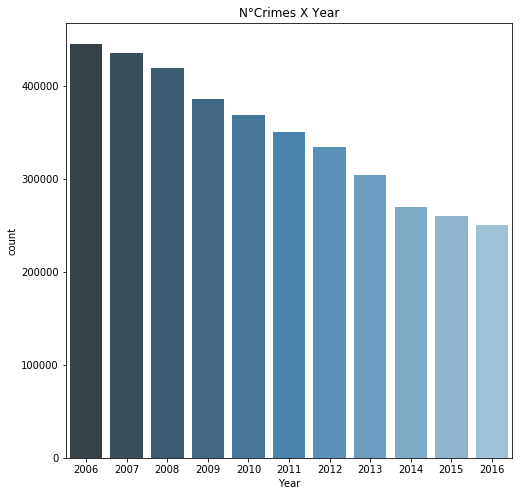

In [89]:
#andamento dei crimini per anno 
plt.figure(figsize=(8,8))
plt.title("N°Crimes X Year")
ax = sns.countplot(Chicago_06_16["Year"], palette="Blues_d" ) 

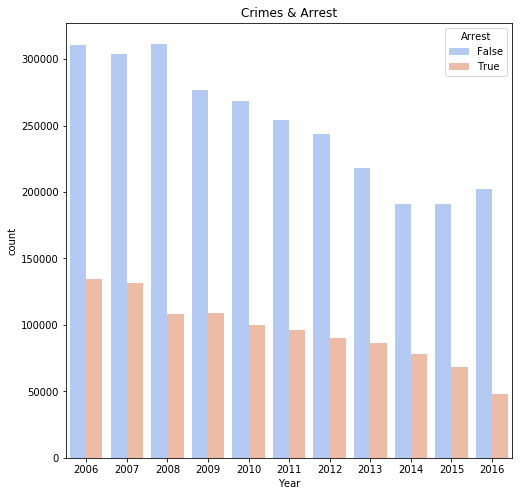

In [86]:
#rispetto al totale dei crimini per anno, in quanti casi c'è stato un arresto?
plt.figure(figsize=(8,8))
plt.title("Crimes & Arrest")

ax = sns.countplot(Chicago_06_16['Year'],hue=Chicago_06_16['Arrest'], palette='coolwarm')


In [55]:
#analisi sul primary type: totale e suddiviso per anno  

In [56]:
Chicago_06_16.Primary_Type.unique()

array(['THEFT', 'BATTERY', 'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE',
       'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION', 'SEX OFFENSE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'ASSAULT', 'BURGLARY',
       'PROSTITUTION', 'KIDNAPPING', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OBSCENITY', 'HOMICIDE', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'STALKING', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION',
       'HUMAN TRAFFICKING'], dtype=object)

Mi accorgo che 'NON - CRIMINAL' e 'NON-CRIMINAL' sono la stessa identica cosa. Utilizzo la funzione replace per pulire il dato e verifico se la modifica è andata a buon fine.

In [57]:
#inserire funzione replace per i non- criminal che mi elimina lo spazio 
Chicago_06_16.Primary_Type=[c.replace( 'NON - CRIMINAL', 'NON-CRIMINAL') for c in Chicago_06_16.Primary_Type]
Chicago_06_16.Primary_Type.unique()

array(['THEFT', 'BATTERY', 'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE',
       'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION', 'SEX OFFENSE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'ASSAULT', 'BURGLARY',
       'PROSTITUTION', 'KIDNAPPING', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OBSCENITY', 'HOMICIDE', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'STALKING', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'CONCEALED CARRY LICENSE VIOLATION', 'HUMAN TRAFFICKING'], dtype=object)

In [58]:
#tipologia di crimini 
crime_count = pd.DataFrame(Chicago_06_16.groupby('Primary_Type').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count

,Primary_Type,Count
0,THEFT,808608
1,BATTERY,687751
2,CRIMINAL DAMAGE,440747
3,NARCOTICS,409946
4,BURGLARY,236173
5,OTHER OFFENSE,232639
6,ASSAULT,231421
7,MOTOR VEHICLE THEFT,172442
8,ROBBERY,148095
9,DECEPTIVE PRACTICE,146466


Rappresento graficamente i primi 10 crimini più commessi.

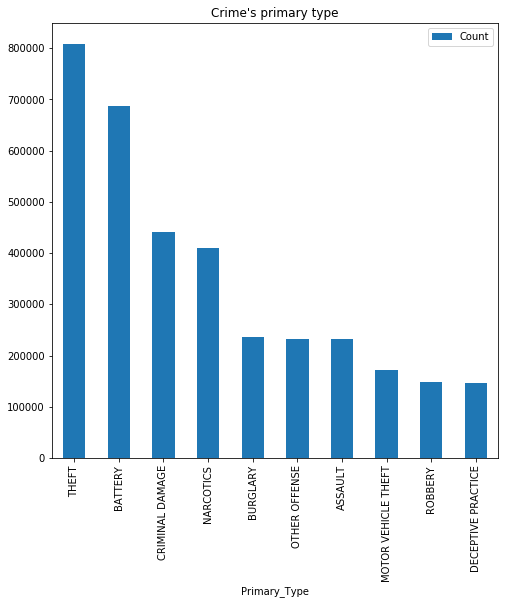

In [78]:
#top 10 tipologia di crimini 
crime_count[:10].plot(x='Primary_Type',y='Count',kind='bar', figsize=(8,8) )
plt.title("Crime's primary type")
plt.show()

Per quant riguarda i primi 5 maggiori crimini commessi, come si è evoluta negli anni ? 

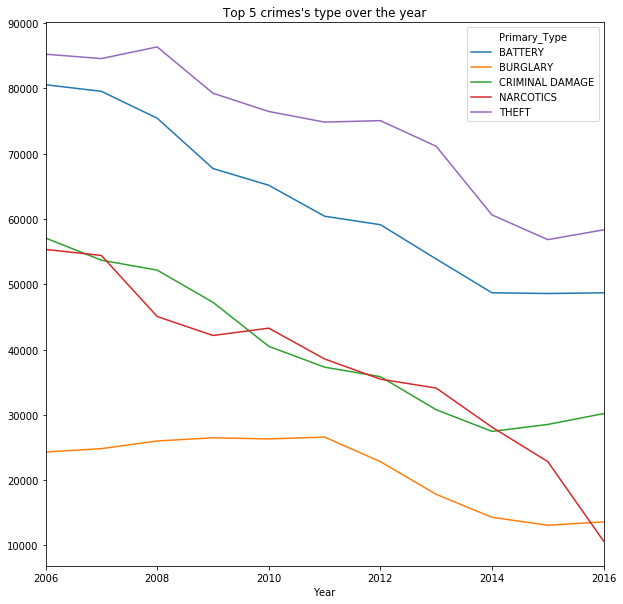

In [80]:
crimes_type = Chicago_06_16.loc[Chicago_06_16.Primary_Type.isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY'])]
crimes_type=crimes_type.groupby(['Year', 'Primary_Type'])
crimes_type=crimes_type['Primary_Type'].count().unstack()
crimes_type.plot(figsize=(10,10))
plt.title("Top 5 crimes's type over the year")
plt.show()

In [ ]:
#creo pivot table con le statistiche principali 
Chicago_06_16.groupby('Primary_Type')['Year'].mean()

Chicago_06_16.groupby(
    ['Primary_Type','Location_Description']
).agg(
    {
        'Primary_Type': [count, 'mean'],
        #'price': "mean",
       # 'calculated_host_listings_count' : [sum,'count','mean']
    }
)